# plot del grafo

In [52]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
archi=pd.read_csv('/kaggle/input/archi-net/archi.csv')
ports=pd.read_csv('/kaggle/input/best-centroids-1/best_centroids (1).csv')
archi

,IMO,Source,Destination
0,9820427,192,190
1,9580091,192,199
2,8913485,81,44
3,8913485,166,72
4,8913485,194,113
...,...,...,...
524,9488322,194,113
525,9488322,166,194
526,9488322,113,194
527,9113745,194,113


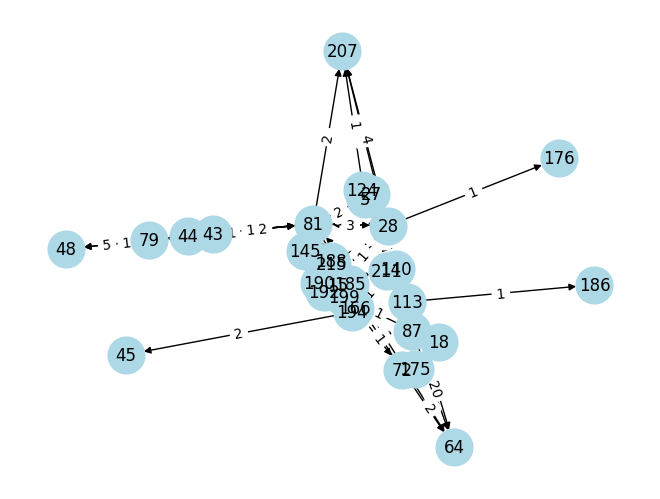

In [53]:
df = pd.DataFrame(archi)

# Creazione del grafo diretto
G = nx.from_pandas_edgelist(df, 'Source', 'Destination', create_using=nx.DiGraph())

# Calcolo dei pesi delle edge
edge_weights = df.groupby(['Source', 'Destination']).size()
nx.set_edge_attributes(G, edge_weights.to_dict(), 'weight')

# Visualizzazione del grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


In [55]:
max_weight_edge = max(G.edges(data=True), key=lambda x: x[2]['weight'])
max_weight_edge

(188, 215, {'weight': 140})

In [61]:
ports[ports['PORT_CODE']==215]

,PORT_CODE,LONGITUDE,LATITUDE,geometry
31,215,1.336914,51.125,POINT (1.3369140625 51.125)
